<a href="https://colab.research.google.com/github/ManqiZhang0513/Data_science_research_Part_B/blob/main/k-means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

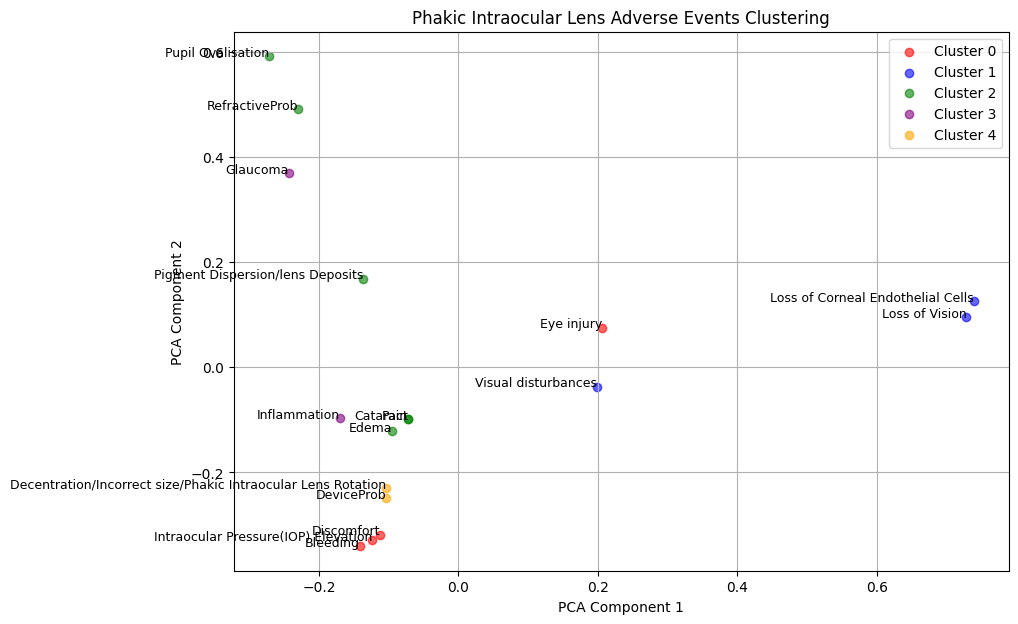

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Constructing structured data extracted from the image (removing the “Other” classification)
data = {
    "Category": [
        "DeviceProb", "Decentration/Incorrect size/Phakic Intraocular Lens Rotation",
    "Pigment Dispersion/lens Deposits", "Discomfort", "Visual disturbances", "Glaucoma",
    "Pain", "Pupil Ovalisation", "Intraocular Pressure(IOP) Elevation",
    "Inflammation", "Edema", "Eye injury", "RefractiveProb", "Cataract",
    "Loss of Vision", "Bleeding", "Loss of Corneal Endothelial Cells"
    ],
    "Keywords": [
        "optic broken|torn|haptic torn|broke injection|diopter tore broke|break injection|was torn|lens tear|lens stuck|due to device",
        "lens rotation|lens decentration|incorrect size|dislocated|dislocation|luxation|dimensional specification claim|repositioned",
        "pigment dispersion|pigment deposition|iris pigment|deposit",
        "fatigue|irritation|sensitivity|vitreous floaters|discomfort|itch|pruritus|foreign body|headache|dizziness|dry eye|excessive tear",
        "blur|visual impairment|visual disturbance|foggy vision|dysphotopsias|reduced vision|glare|halo|flare|dazzling|hazing|lightpoint|diplopia|double vision",
        "pupillary block glaucoma|malignant glaucoma|acute glaucoma|secondary glaucoma|angle closure glaucoma|angle closure|pupil block|iris atrophy",
        "hurt|painful|ache|suffering|pain",
        "pupil ovalisation|iris atrophy",
        "iop elevation|elevated iop|increased iop|intraocular pressure elevation|elevated intraocular pressure|excessive vault|increased eye pressure|eye pressure elevation|elevated eye pressure",
        "infection|infected|inflammation|endophthalmitis|toxic anterior segment syndrome|tass|uveitis|ugh|uveitis glaucoma|hyphema|hypopyon|ulcer|keratitis|conjunctivitis|cyst|ciliary body inflammation|ugh syndrome",
        "swelling|edema|oedema|swollen|cyst",
        "corneal decompensation|corneal damage|capsular bag tear|iris damage|endothelial damage|endothelial cell injury|corneal abrasion|suspensory ligament injury|vitreous humor|optical nerve damage",
        "unreactive fixed pupil|fixed iris|refractive surprise",
        "cataract",
        "blind|loss eyesight|loss of vision",
        "bleed|hyphema|blood|red eye",
        "endothelial cell loss|loss of endothelial cell"
    ]
}

# Creat DataFrame
df = pd.DataFrame(data)

# Text pre-processing: using TF-IDF to vectorize keywords
vectorizer = TfidfVectorizer(token_pattern=r'\b\w+\b')
X = vectorizer.fit_transform(df["Keywords"])

# Cluster analysis using K-Means
num_clusters = 5  # Assumptions are divided into 5 major categories
kmeans = KMeans(n_clusters=num_clusters, random_state=5)
df['Cluster'] = kmeans.fit_predict(X)

# Downscaling using PCA for easy visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# Plotting the clustering results
plt.figure(figsize=(10, 7))
colors = ['red', 'blue', 'green', 'purple', 'orange']
for i in range(num_clusters):
    plt.scatter(X_pca[df['Cluster'] == i, 0], X_pca[df['Cluster'] == i, 1],
                label=f'Cluster {i}', color=colors[i], alpha=0.6)

# Add Tags
for i, category in enumerate(df["Category"]):
    plt.text(X_pca[i, 0], X_pca[i, 1], category, fontsize=9, ha='right')

plt.title("Phakic Intraocular Lens Adverse Events Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid()
plt.show()






In [2]:
from IPython.display import display
display(df)

,Category,Keywords,Cluster
0,DeviceProb,optic broken|torn|haptic torn|broke injection|...,4
1,Decentration/Incorrect size/Phakic Intraocular...,lens rotation|lens decentration|incorrect size...,4
2,Pigment Dispersion/lens Deposits,pigment dispersion|pigment deposition|iris pig...,2
3,Discomfort,fatigue|irritation|sensitivity|vitreous floate...,0
4,Visual disturbances,blur|visual impairment|visual disturbance|fogg...,1
5,Glaucoma,pupillary block glaucoma|malignant glaucoma|ac...,3
6,Pain,hurt|painful|ache|suffering|pain,2
7,Pupil Ovalisation,pupil ovalisation|iris atrophy,2
8,Intraocular Pressure(IOP) Elevation,iop elevation|elevated iop|increased iop|intra...,0
9,Inflammation,infection|infected|inflammation|endophthalmiti...,3
